## Import Python Libraries

In [1]:
### Import Standard Python Libraries
import warnings
warnings.filterwarnings("ignore") 

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Removes the limit from the number of displayed columns and rows.
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

## Upload Dataset and Overview

In [2]:
## read ECA dataset from csv file given
data = pd.read_csv (r'ECA_data.csv')
data.head()

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,S2,S3,S4,S5,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
0,1,210000,0.00,235822,1,1,1.0,2.0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,260000,10928.05,278481,0,0,2.0,2.0,31,0,0,0,0,0,54074,46407,38874,31324,24031,2000,2000,2000,2000,72000
2,3,400000,65397.85,431993,0,0,3.0,1.0,51,0,0,0,0,0,343591,352484,338823,283288,185288,15000,14000,11500,8000,7000
3,4,20000,3695.30,22368,0,0,2.0,1.0,58,-1,2,2,-1,-1,21470,200,0,28740,1295,0,0,28740,1565,0
4,5,180000,68.25,166900,0,1,2.0,1.0,42,0,0,0,0,0,1260,598,2056,4300,1802,598,2056,4300,1802,3691


In [3]:
data.shape

(18769, 24)

In [4]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18769 entries, 0 to 18768
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         18769 non-null  int64  
 1   LIMIT      18769 non-null  int64  
 2   BALANCE    18769 non-null  float64
 3   INCOME     18769 non-null  int64  
 4   RATING     18769 non-null  int64  
 5   GENDER     18769 non-null  int64  
 6   EDUCATION  18756 non-null  float64
 7   MARITAL    18731 non-null  float64
 8   AGE        18769 non-null  int64  
 9   S1         18769 non-null  int64  
 10  S2         18769 non-null  int64  
 11  S3         18769 non-null  int64  
 12  S4         18769 non-null  int64  
 13  S5         18769 non-null  int64  
 14  B1         18769 non-null  int64  
 15  B2         18769 non-null  int64  
 16  B3         18769 non-null  int64  
 17  B4         18769 non-null  int64  
 18  B5         18769 non-null  int64  
 19  R1         18769 non-null  int64  
 20  R2    

# Question 2 and 3- Data Pre-Processing and insight from data

## 1. Data Cleaning

### 1-1 : Missing Values Treatment

In [5]:
data.isnull().values.any() 

True

In [6]:
data.isnull().sum()

ID            0
LIMIT         0
BALANCE       0
INCOME        0
RATING        0
GENDER        0
EDUCATION    13
MARITAL      38
AGE           0
S1            0
S2            0
S3            0
S4            0
S5            0
B1            0
B2            0
B3            0
B4            0
B5            0
R1            0
R2            0
R3            0
R4            0
R5            0
dtype: int64

* There are few row with misisng value so we can drop these data by using pandas.dataframe.dropna() function.

In [7]:
data = data.dropna()
data.isnull().sum()

ID           0
LIMIT        0
BALANCE      0
INCOME       0
RATING       0
GENDER       0
EDUCATION    0
MARITAL      0
AGE          0
S1           0
S2           0
S3           0
S4           0
S5           0
B1           0
B2           0
B3           0
B4           0
B5           0
R1           0
R2           0
R3           0
R4           0
R5           0
dtype: int64

In [8]:
data.shape

(18720, 24)

* As the result I could get 18720 rows that have not any missing values for each column.

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,18720.0,9381.028419,5419.090246,1.0,4685.7500,9381.5000,14076.25000,18766.00
LIMIT,18720.0,168307.888889,129496.631582,10000.0,50000.0000,140000.0000,240000.00000,800000.00
BALANCE,18720.0,9135.957564,13057.178823,0.0,644.6125,3974.5125,11986.31875,130692.45
INCOME,18720.0,177815.004006,143200.252119,10000.0,56427.7500,148178.0000,257206.75000,908846.00
RATING,18720.0,0.219605,0.413990,0.0,0.0000,0.0000,0.00000,1.00
GENDER,18720.0,0.618056,0.485876,0.0,0.0000,1.0000,1.00000,1.00
EDUCATION,18720.0,1.788034,0.731373,0.0,1.0000,2.0000,2.00000,3.00
MARITAL,18720.0,1.514850,0.519602,0.0,1.0000,2.0000,2.00000,2.00
AGE,18720.0,35.571902,9.559504,-1.0,28.0000,34.0000,41.00000,199.00
S1,18720.0,0.129113,0.954573,-1.0,0.0000,0.0000,0.00000,7.00


### 1-2 : Pre-Processing about R3 column

* Convert string type in R3 column into numerical type to make all values integer
* remove "$" from R3 column

In [10]:
data =data.reset_index(drop=True)
drop_idx = []
for idx in range(len(data)):
    val = str(data['R3'][idx])
    try:
        data['R3'][idx] = int(val)
    except:
        print(val)
        data['R3'][idx] = int(val.replace("$","").replace(",","").strip())

$0
$2,620
$6,000
$2,200
$390
$2,688
$13,069
$7,000
$5,000
$2,089


In [11]:
data['R3'] = data['R3'].astype(str).astype(int)
data['R3'].dtypes

dtype('int32')

In [12]:
data['R3']

0            0
1         2000
2        11500
3        28740
4         4300
         ...  
18715     3047
18716      129
18717     4200
18718     1926
18719     1000
Name: R3, Length: 18720, dtype: int32

### 1-3 : Histplot for given Dataset and column

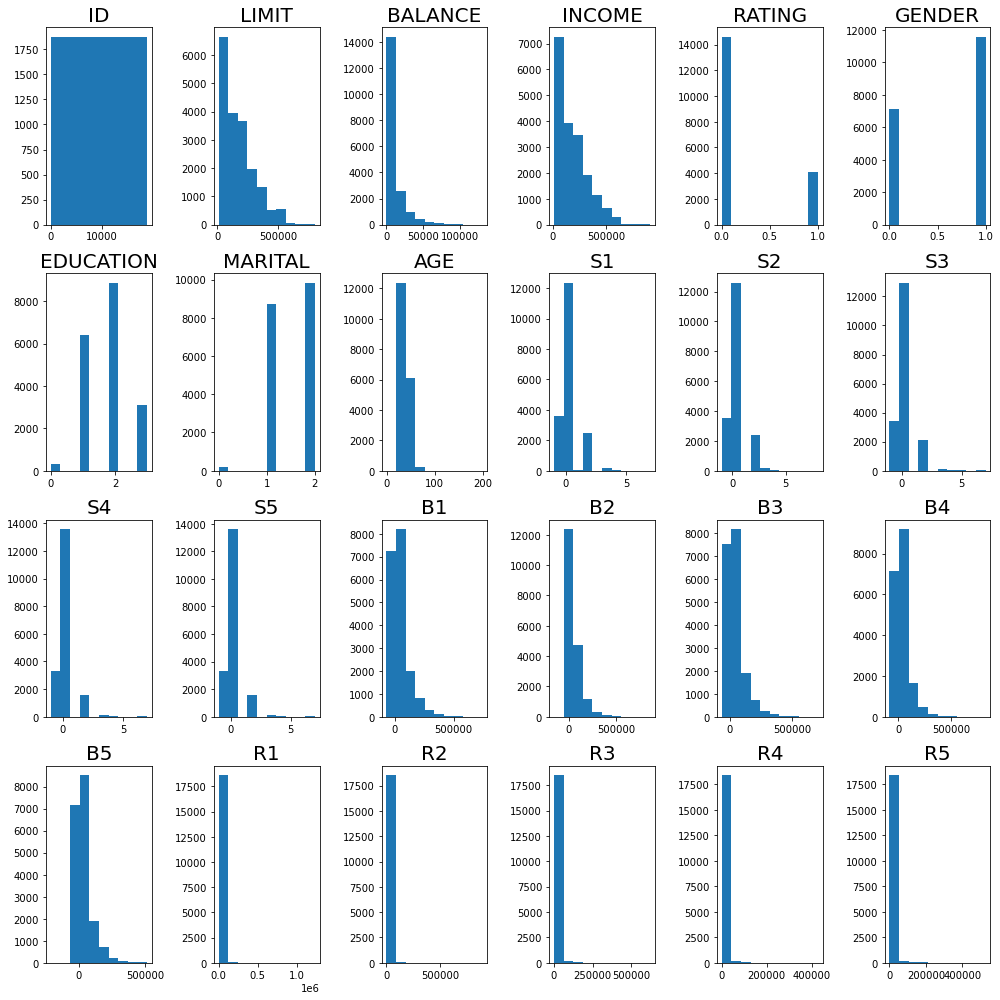

In [13]:
plt.figure(figsize=(14,14))

i = 0
for col in data.columns:
    plt.subplot(4,6,i+1)
    plt.hist(data[col])
    plt.tight_layout()
    plt.title(col,fontsize=20)
    i+=1

plt.show()

### 1-4 : Pre-Processing and Analysis for RATING

In [14]:
data["RATING"] = data["RATING"].map({0:'Good', 1:"Bad"})
data["RATING"].value_counts()  

Good    14609
Bad      4111
Name: RATING, dtype: int64

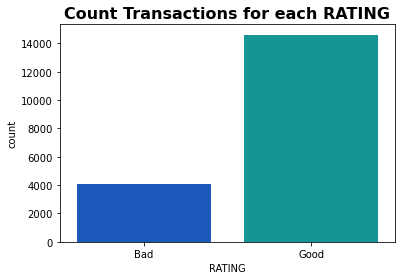

In [15]:
plt.figure(figsize = (6, 4))
ax = sns.countplot(data["RATING"], palette="winter")
plt.title("Count Transactions for each RATING", fontweight='bold', fontsize=16)
plt.show()

In [16]:
data[['RATING', 'B1']].groupby(['RATING']).mean().reset_index()

,RATING,B1
0,Bad,47908.969107
1,Good,50675.083442


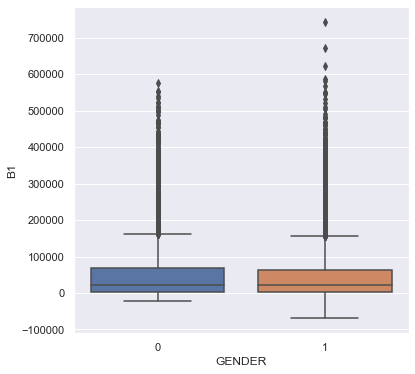

In [17]:
sns.set(rc={"figure.figsize": (6, 6)})
sns.boxplot(x="GENDER", y="B1", data=data, orient="vertical")
plt.show()

### 1-5 : Pre-Processing and Analysis for GENDER

In [18]:
data["GENDER"] = data["GENDER"].map({0:'Male', 1:"Female"})
data["GENDER"].value_counts()  

Female    11570
Male       7150
Name: GENDER, dtype: int64

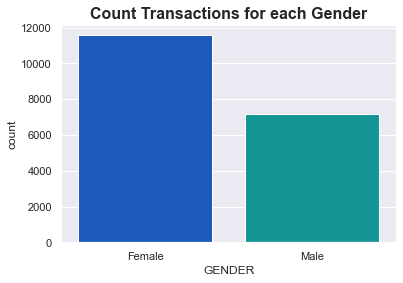

In [19]:
plt.figure(figsize = (6, 4))
ax = sns.countplot(data["GENDER"], palette="winter")
plt.title("Count Transactions for each Gender", fontweight='bold', fontsize=16)
plt.show()

In [20]:
data[['GENDER', 'B1']].groupby(['GENDER']).mean().reset_index()

,GENDER,B1
0,Female,48166.331979
1,Male,53144.280420


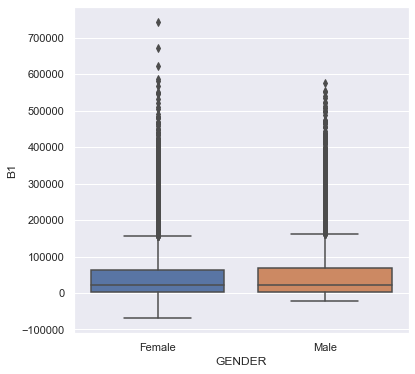

In [21]:
sns.set(rc={"figure.figsize": (6, 6)})
sns.boxplot(x="GENDER", y="B1", data=data, orient="vertical")
plt.show()

### 1-6 : Pre-Processing and Analysis for EDUCATION

In [22]:
data["EDUCATION"] = data["EDUCATION"].map({0:'Others', 1:"PostGraduate", 2:"Tertiary", 3:"High School"})
data["EDUCATION"].value_counts()    

Tertiary        8868
PostGraduate    6409
High School     3109
Others           334
Name: EDUCATION, dtype: int64

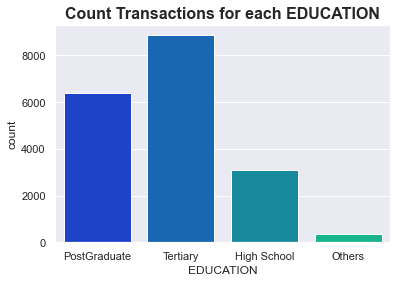

In [23]:
plt.figure(figsize = (6, 4))
ax = sns.countplot(data["EDUCATION"], palette="winter")
plt.title("Count Transactions for each EDUCATION", fontweight='bold', fontsize=16)
plt.show()

In [24]:
data[['EDUCATION', 'B1']].groupby(['EDUCATION']).mean().reset_index()

,EDUCATION,B1
0,High School,46031.236410
1,Others,66984.556886
2,PostGraduate,47900.330317
3,Tertiary,52411.918471


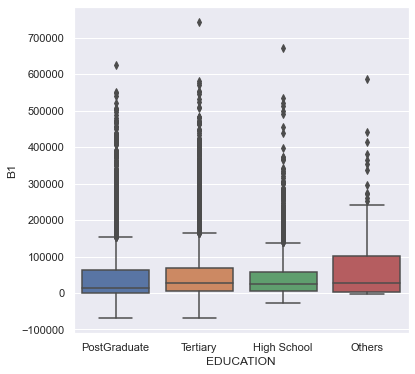

In [25]:
sns.set(rc={"figure.figsize": (6, 6)})
sns.boxplot(x="EDUCATION", y="B1", data=data, orient="vertical")
plt.show()

### 1-7 : Pre-Processing and Analysis for MARITAL status

In [26]:
data["MARITAL"] = data["MARITAL"].map({0:'Others', 1:"Single", 2:"Married"})
data["MARITAL"].value_counts()                                      

Married    9827
Single     8704
Others      189
Name: MARITAL, dtype: int64

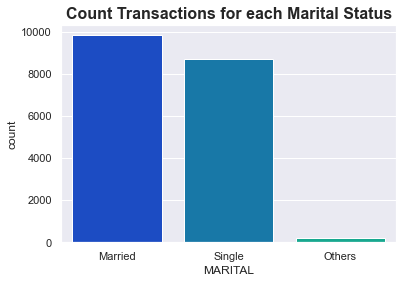

In [27]:
plt.figure(figsize = (6, 4))
ax = sns.countplot(data["MARITAL"], palette="winter")
plt.title("Count Transactions for each Marital Status", fontweight='bold', fontsize=16)
plt.show()

In [28]:
data[['MARITAL', 'B1']].groupby(['MARITAL']).mean().reset_index()

,MARITAL,B1
0,Married,49126.873308
1,Others,41463.058201
2,Single,51316.608915


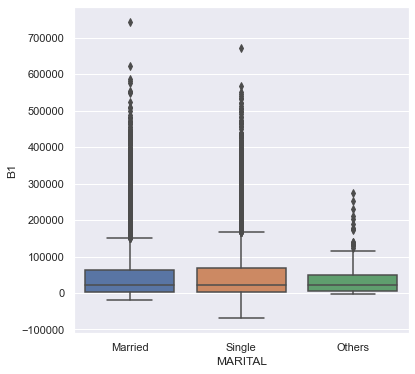

In [29]:
sns.set(rc={"figure.figsize": (6, 6)})
sns.boxplot(x="MARITAL", y="B1", data=data, orient="vertical")
plt.show()

### 1-8 : Data Pre-Processing for AGE

In [30]:
data['AGE'].min(), data['AGE'].max()

(-1, 199)

In [31]:
data['AGE'].value_counts()

 29     994
 27     943
 28     898
 30     869
 31     778
 26     771
 25     722
 32     721
 34     721
 35     721
 33     695
 36     674
 24     658
 37     651
 38     612
 39     601
 23     564
 40     562
 41     524
 42     496
 44     447
 43     420
 45     402
 46     373
 22     333
 47     306
 48     276
 49     273
 50     267
 51     204
 53     188
 52     187
 54     163
 55     142
 56     118
 58      75
 57      69
 59      52
 21      41
 61      37
 60      36
 62      28
 64      21
 63      16
 65      15
 66      13
 69       8
 67       8
-1        5
 199      5
 70       5
 68       2
 73       2
 72       2
 75       2
 71       1
 80       1
 79       1
 74       1
Name: AGE, dtype: int64

In [32]:
data = data[(data['AGE']!=-1)&(data['AGE']!=199)]
data.shape

(18710, 24)

In [33]:
data['AGE'].min(), data['AGE'].max()

(21, 80)

In [34]:
bins = [20,39,59,81]
labels=["Young","Middle", "Old"]
data['AGE'] = pd.cut(data['AGE'], bins=bins, labels=labels, include_lowest=True)
data['AGE'].value_counts()

Young     12967
Middle     5544
Old         199
Name: AGE, dtype: int64

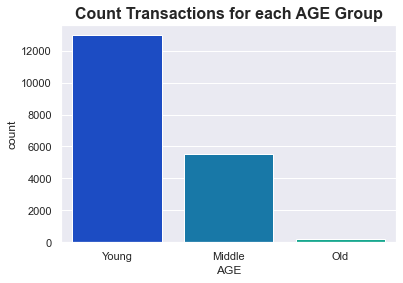

In [35]:
plt.figure(figsize = (6, 4))
ax = sns.countplot(data["AGE"], palette="winter")
plt.title("Count Transactions for each AGE Group", fontweight='bold', fontsize=16)
plt.show()

In [36]:
data[['AGE', 'B1']].groupby(['AGE']).mean().reset_index()

,AGE,B1
0,Young,48613.684815
1,Middle,52845.299964
2,Old,68248.793970


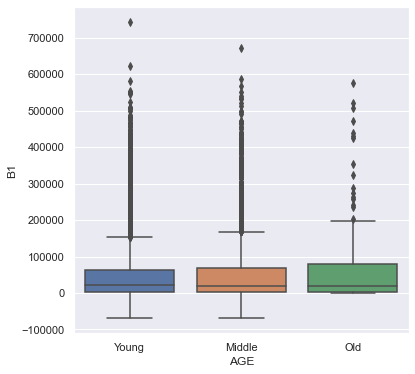

In [37]:
sns.set(rc={"figure.figsize": (6, 6)})
sns.boxplot(x="AGE", y="B1", data=data, orient="vertical")
plt.show()

### 1-9 : Drop ID column from dataset

In [38]:
data = data.drop(['ID'], axis=1)
data.head()

,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,S2,S3,S4,S5,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
0,210000,0.00,235822,Bad,Female,PostGraduate,Married,Young,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,260000,10928.05,278481,Good,Male,Tertiary,Married,Young,0,0,0,0,0,54074,46407,38874,31324,24031,2000,2000,2000,2000,72000
2,400000,65397.85,431993,Good,Male,High School,Single,Middle,0,0,0,0,0,343591,352484,338823,283288,185288,15000,14000,11500,8000,7000
3,20000,3695.30,22368,Good,Male,Tertiary,Single,Middle,-1,2,2,-1,-1,21470,200,0,28740,1295,0,0,28740,1565,0
4,180000,68.25,166900,Good,Female,Tertiary,Single,Middle,0,0,0,0,0,1260,598,2056,4300,1802,598,2056,4300,1802,3691


In [39]:
data['S1'] = pd.Categorical(data['S1'])
data['S2'] = pd.Categorical(data['S2'])
data['S3'] = pd.Categorical(data['S3'])
data['S4'] = pd.Categorical(data['S4'])
data['S5'] = pd.Categorical(data['S5'])
data.dtypes

LIMIT           int64
BALANCE       float64
INCOME          int64
RATING         object
GENDER         object
EDUCATION      object
MARITAL        object
AGE          category
S1           category
S2           category
S3           category
S4           category
S5           category
B1              int64
B2              int64
B3              int64
B4              int64
B5              int64
R1              int64
R2              int64
R3              int32
R4              int64
R5              int64
dtype: object

## 2 : Remove Outliers from dataset

In [40]:
def drop_outliers(df, cols):
    for field_name in cols:
        iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
        df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
        df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
    return df

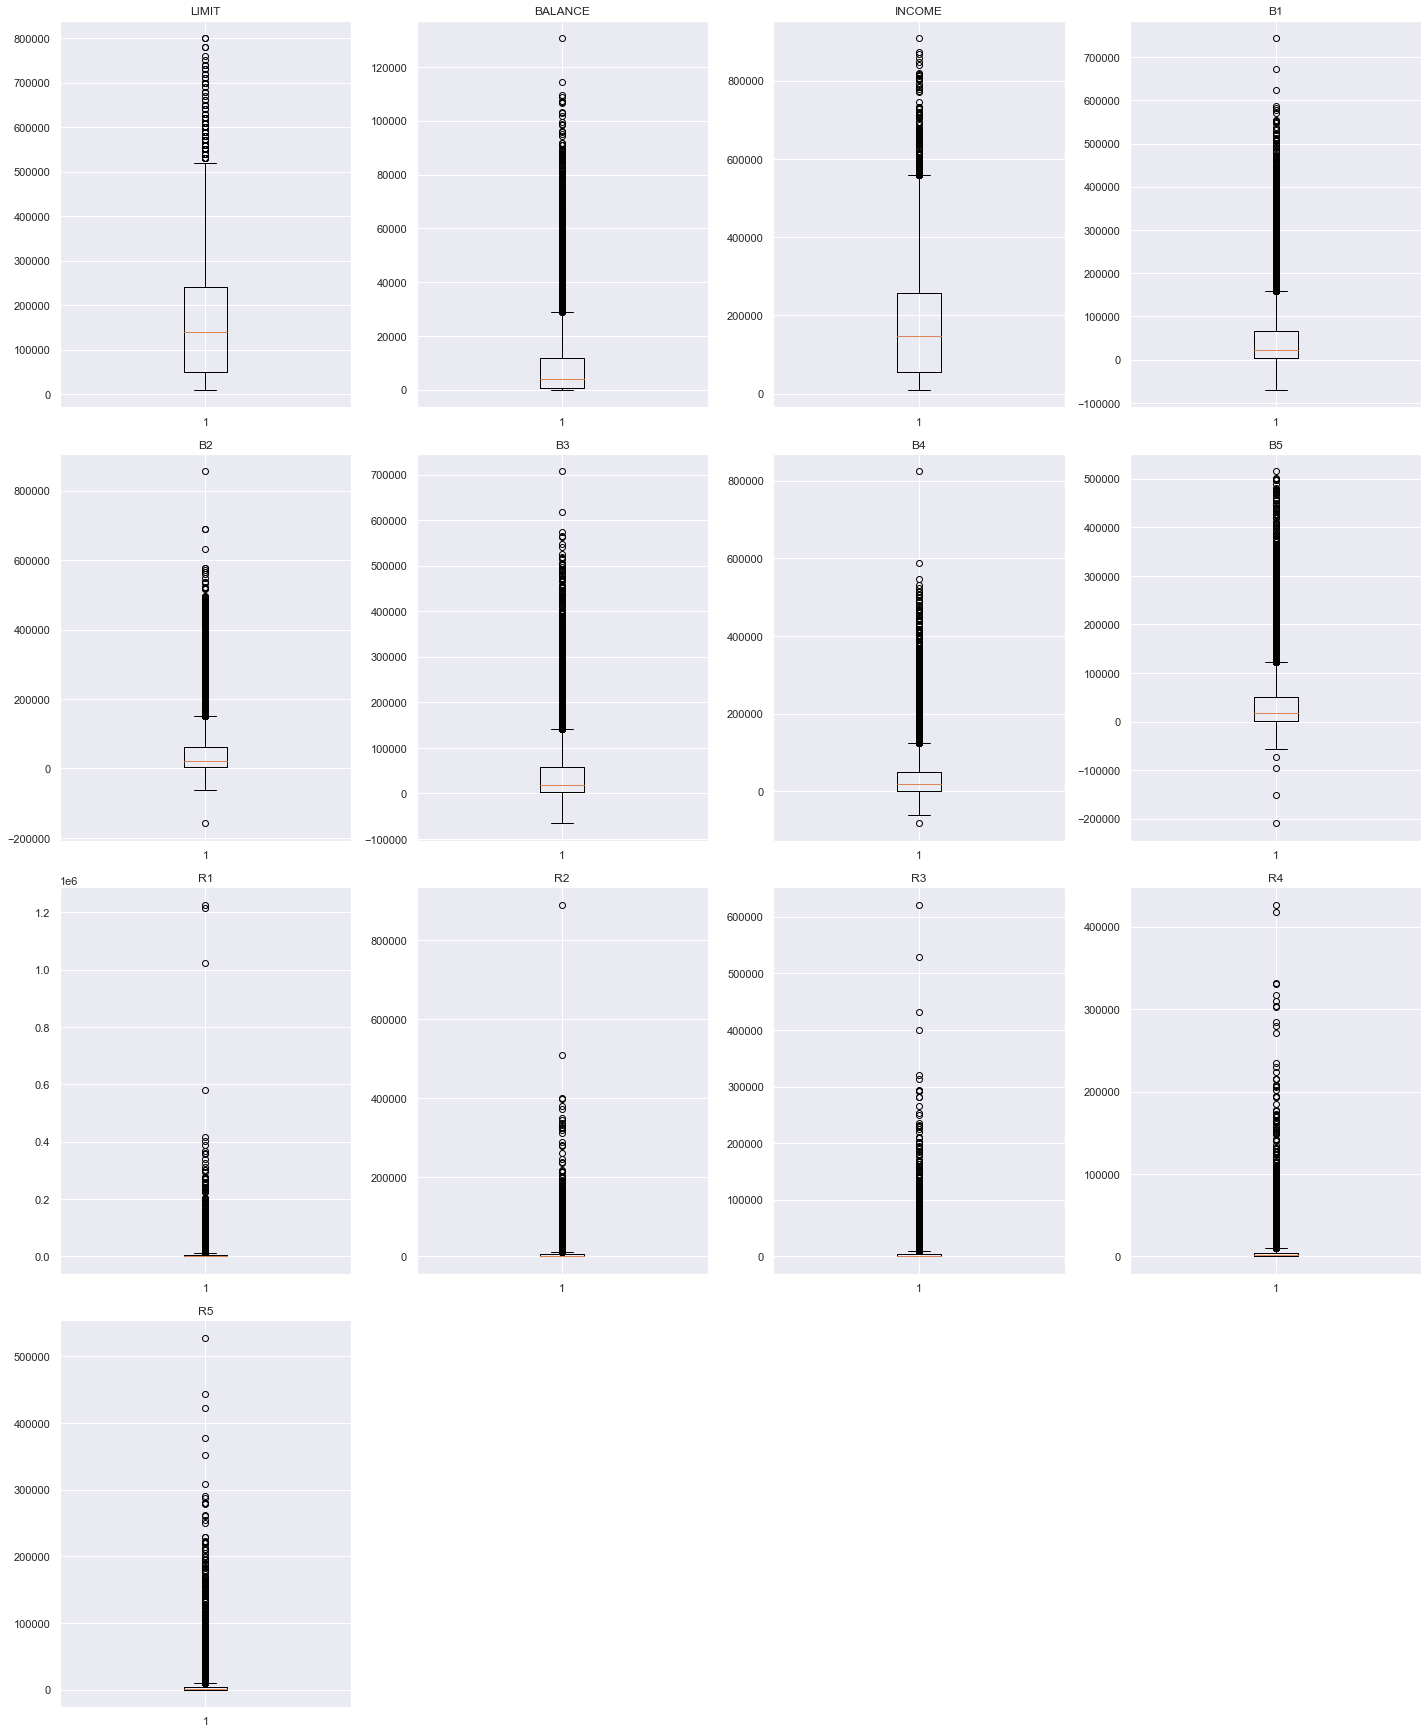

In [41]:
def plot_boxplot(df):
    numerical_col = df.select_dtypes(include=np.number).columns.tolist()
    plt.figure(figsize=(20,30))

    for i, variable in enumerate(numerical_col):
                         plt.subplot(5,4,i+1)
                         plt.boxplot(df[variable],whis=1.5)
                         plt.tight_layout()
                         plt.title(variable)
    plt.show()
plot_boxplot(data)

In [42]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
print(numerical_col)
df_copy = data.copy()
df_without_outliers = drop_outliers(df_copy, numerical_col)
df_without_outliers.shape, data.shape

['LIMIT', 'BALANCE', 'INCOME', 'B1', 'B2', 'B3', 'B4', 'B5', 'R1', 'R2', 'R3', 'R4', 'R5']


((9668, 23), (18710, 23))

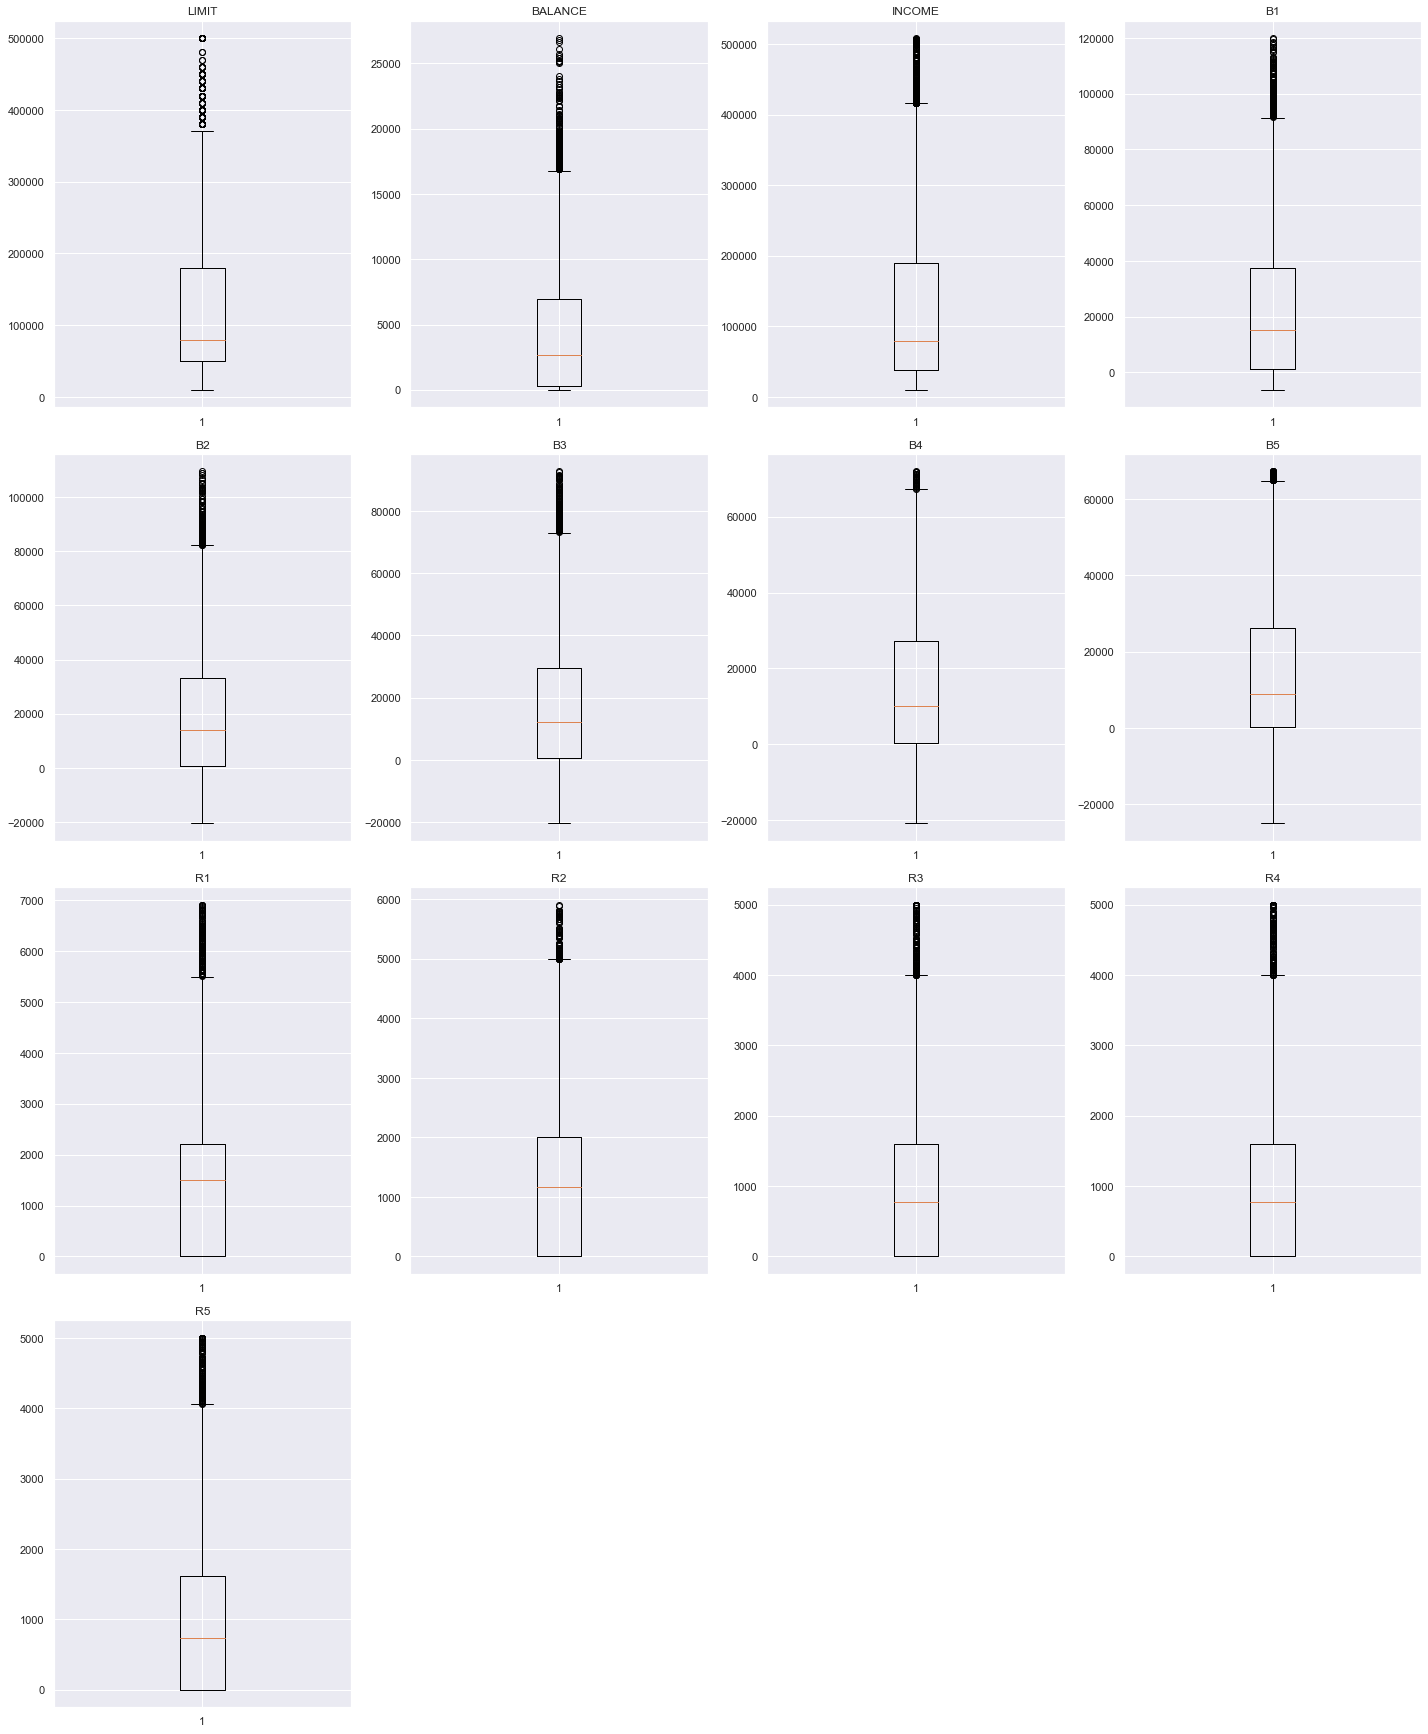

In [43]:
plot_boxplot(df_without_outliers)

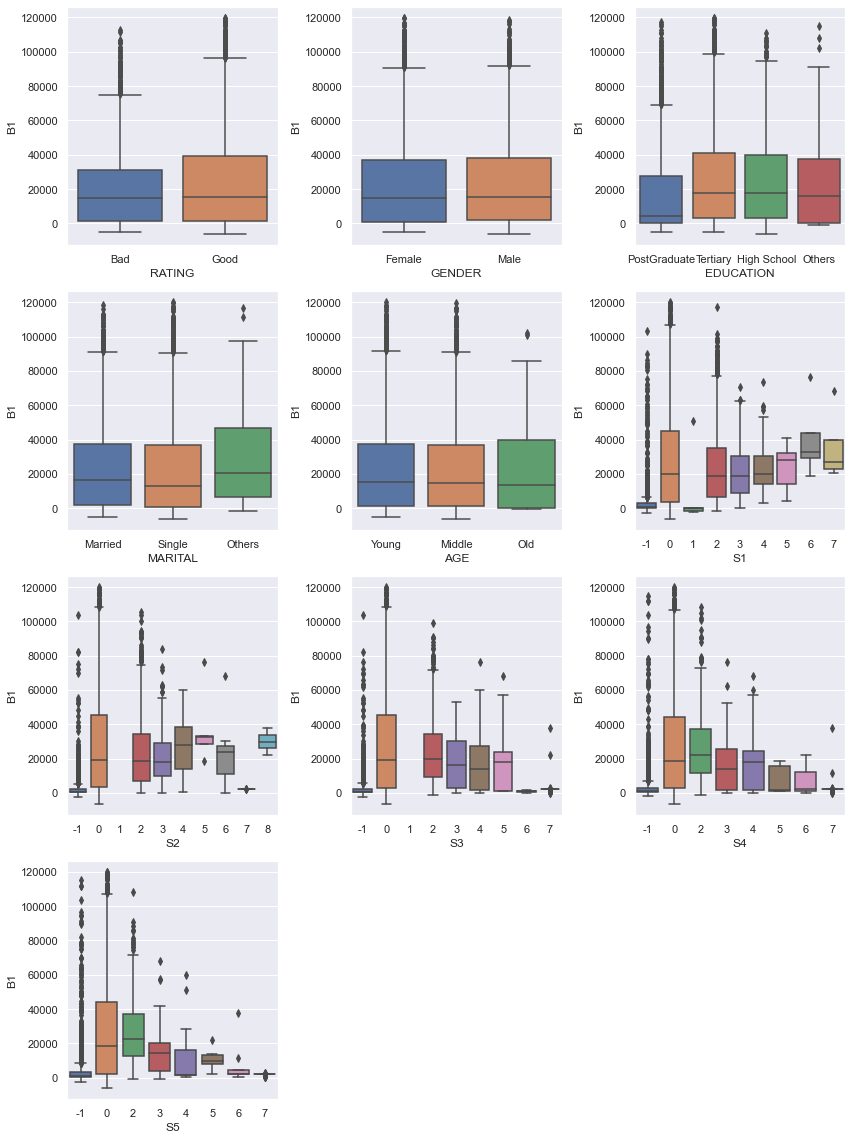

In [44]:
plt.figure(figsize=(12,16))
i = 1
for col in data.columns:
    if col not in numerical_col:
        if col != 'B1':
            plt.subplot(4,3,i)
            sns.boxplot(x=col, y="B1", data=df_without_outliers, orient="vertical")
            plt.tight_layout()
            i +=1
plt.show()

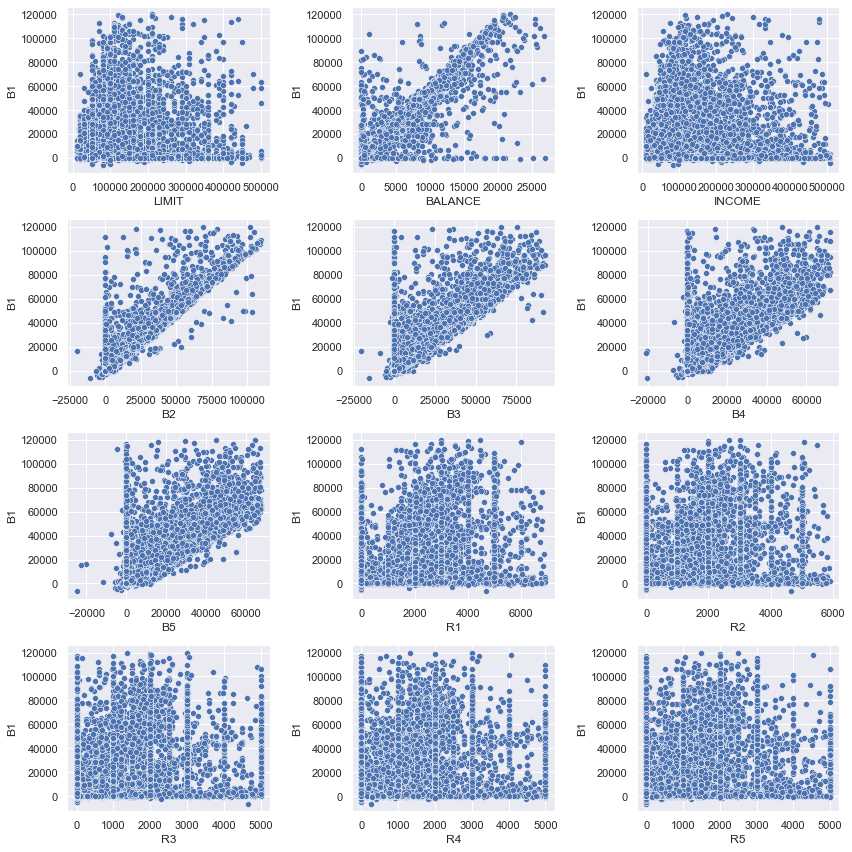

In [45]:
plt.figure(figsize=(12,12))
i = 1
for col in data.columns:
    if col in numerical_col:
        if col != 'B1':
            plt.subplot(4,3,i)
            sns.scatterplot(x=col, y="B1", data =df_without_outliers )
            plt.tight_layout()
            i +=1
plt.show()

In [46]:
df_without_outliers.shape

(9668, 23)

In [47]:
df_without_outliers.head()

,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,S2,S3,S4,S5,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
0,210000,0.00,235822,Bad,Female,PostGraduate,Married,Young,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,180000,68.25,166900,Good,Female,Tertiary,Single,Middle,0,0,0,0,0,1260,598,2056,4300,1802,598,2056,4300,1802,3691
6,30000,4950.75,23160,Good,Male,High School,Married,Middle,2,2,0,0,0,30728,29701,29121,29715,0,0,600,594,0,0
7,50000,7139.65,56265,Good,Female,Tertiary,Single,Young,0,0,0,0,0,38937,34737,18702,15604,16333,2000,1000,578,1000,1000
9,30000,5240.20,20139,Good,Female,PostGraduate,Married,Young,4,3,2,3,2,29399,28632,30363,29594,30932,0,2500,0,2000,0


## 3. Feature Encoding

In [48]:
df = df_without_outliers.copy()
df_enc = pd.get_dummies(data = df, columns = ['RATING', 'GENDER', 'EDUCATION', 'MARITAL', 'AGE'])
df_enc.head()

,LIMIT,BALANCE,INCOME,S1,S2,S3,S4,S5,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5,RATING_Bad,RATING_Good,GENDER_Female,GENDER_Male,EDUCATION_High School,EDUCATION_Others,EDUCATION_PostGraduate,EDUCATION_Tertiary,MARITAL_Married,MARITAL_Others,MARITAL_Single,AGE_Young,AGE_Middle,AGE_Old
0,210000,0.00,235822,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0
4,180000,68.25,166900,0,0,0,0,0,1260,598,2056,4300,1802,598,2056,4300,1802,3691,0,1,1,0,0,0,0,1,0,0,1,0,1,0
6,30000,4950.75,23160,2,2,0,0,0,30728,29701,29121,29715,0,0,600,594,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0
7,50000,7139.65,56265,0,0,0,0,0,38937,34737,18702,15604,16333,2000,1000,578,1000,1000,0,1,1,0,0,0,0,1,0,0,1,1,0,0
9,30000,5240.20,20139,4,3,2,3,2,29399,28632,30363,29594,30932,0,2500,0,2000,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0


In [49]:
df_enc.shape

(9668, 32)

## 4. Min Max Scaling for Numerical Features

In [50]:
numerical_col

['LIMIT',
 'BALANCE',
 'INCOME',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'R1',
 'R2',
 'R3',
 'R4',
 'R5']

In [51]:
def apply_min_max_scaling(df, col):
    df_temp = df[col].copy()
    min_value = min(df_temp)
    max_value = max(df_temp)
    
    new_data = []
    for value in df_temp:
        new_data.append((value - min_value)/(max_value - min_value))
    
    df[col] = new_data
    return df

In [52]:
for col in numerical_col:
    if col != 'B1':
        df_enc = apply_min_max_scaling(df_enc, col)

df_enc.head()

,LIMIT,BALANCE,INCOME,S1,S2,S3,S4,S5,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5,RATING_Bad,RATING_Good,GENDER_Female,GENDER_Male,EDUCATION_High School,EDUCATION_Others,EDUCATION_PostGraduate,EDUCATION_Tertiary,MARITAL_Married,MARITAL_Others,MARITAL_Single,AGE_Young,AGE_Middle,AGE_Old
0,0.408163,0.000000,0.452886,0,0,0,0,0,0,0.156649,0.179737,0.223986,0.270314,0.000000,0.000000,0.0000,0.0000,0.0000,1,0,1,0,0,0,1,0,1,0,0,1,0,0
4,0.346939,0.002534,0.314663,0,0,0,0,0,1260,0.161259,0.197923,0.270396,0.289861,0.086529,0.348003,0.8600,0.3604,0.7382,0,1,1,0,0,0,0,1,0,0,1,0,1,0
6,0.040816,0.183821,0.026392,2,2,0,0,0,30728,0.385616,0.437322,0.544699,0.270314,0.000000,0.101557,0.1188,0.0000,0.0000,0,1,0,1,1,0,0,0,1,0,0,0,1,0
7,0.081633,0.265094,0.092784,0,0,0,0,0,38937,0.424439,0.345162,0.392400,0.447483,0.289394,0.169262,0.1156,0.2000,0.2000,0,1,1,0,0,0,0,1,0,0,1,1,0,0
9,0.040816,0.194568,0.020334,4,3,2,3,2,29399,0.377375,0.448308,0.543393,0.605842,0.000000,0.423155,0.0000,0.4000,0.0000,0,1,1,0,0,0,1,0,1,0,0,1,0,0


## 5. Feature Selection

In [53]:
df_enc['S1'] = df_enc['S1'].astype('int')
df_enc['S2'] = df_enc['S2'].astype('int')
df_enc['S3'] = df_enc['S3'].astype('int')
df_enc['S4'] = df_enc['S4'].astype('int')
df_enc['S5'] = df_enc['S5'].astype('int')

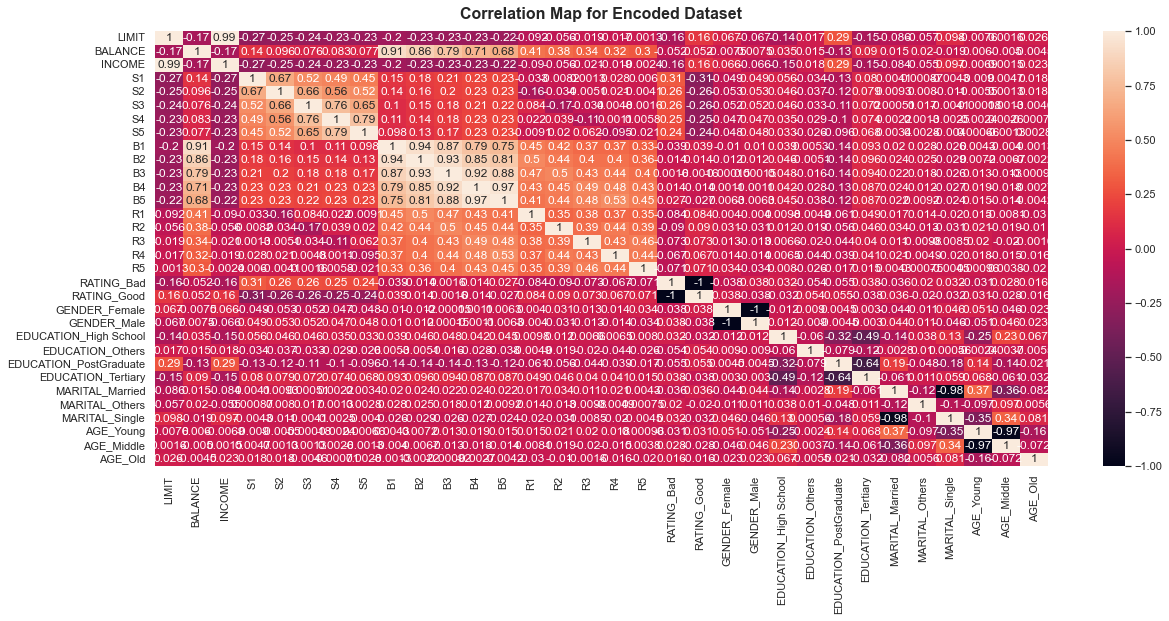

In [54]:
 ### Plotting the correlation between various columns of the filter_dataset
plt.figure(figsize = (20, 8))
heatmap = sns.heatmap(df_enc.corr(), vmin = -1, vmax = 1, annot = True)
heatmap.set_title('Correlation Map for Encoded Dataset', fontdict = {'fontsize' : 16, 'fontweight' : 'bold'}, pad = 12)
plt.show()

In [55]:
#Correlation with output variable
cor = df_enc.corr()
cor_target = abs(cor["B1"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
relevant_features

BALANCE    0.914882
B1         1.000000
B2         0.936014
B3         0.868728
B4         0.786490
B5         0.748274
R1         0.450305
R2         0.415944
R3         0.370011
R4         0.367561
R5         0.334890
Name: B1, dtype: float64

In [56]:
selected_features = list(relevant_features.index)
selected_features

['BALANCE', 'B1', 'B2', 'B3', 'B4', 'B5', 'R1', 'R2', 'R3', 'R4', 'R5']

# Questoin 4- Linear Regression Modeling

### 1. Splitting the dataset to Training and Test sets

In [57]:
# Library to split data
from sklearn.model_selection import train_test_split

In [58]:
df_selected = df_enc[selected_features]
X_df = df_selected.drop(['B1'],axis = 1)
Y_df = df_selected[['B1']]

X = X_df.values
Y = Y_df.values

In [59]:
## Split the dataset into train and test in the ratio of 80 : 20
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0, shuffle = True)
X_train.shape, X_test.shape

((7734, 10), (1934, 10))

In [60]:
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

### 2. Fit and Prediction using Linear Regression Model

In [61]:
## initialize Linear Regression Model and train. 
Model_LR = LinearRegression()
Model_LR.fit(X_train, Y_train)

## prediction using DecisionTree Regression Model
Y_pred_LR = Model_LR.predict(X_test)

### 3. Model Evaluation by RMSE & R2 score

In [62]:
### RMSE and Adjusted R-squared for the RF model

mse_LR = round(mean_squared_error(Y_test, Y_pred_LR), 3)
rmse_LR = round(sqrt(mse_LR), 3)
r2_LR = round(r2_score(Y_test, Y_pred_LR), 3)

print('RMSE of Linear Regression : {}'.format(rmse_LR))
print('R2-Score of Linear Regression : {}'.format(r2_LR))

RMSE of Linear Regression : 6176.536
R2-Score of Linear Regression : 0.936


### 4. Prediction Result Visualization

In [63]:
## get range of X_test data
x_label = list(range(len(X_test)))

## get Residuals for  predicted values of Regression
residuals_LR = Y_test[:,0] - Y_pred_LR[:, 0]

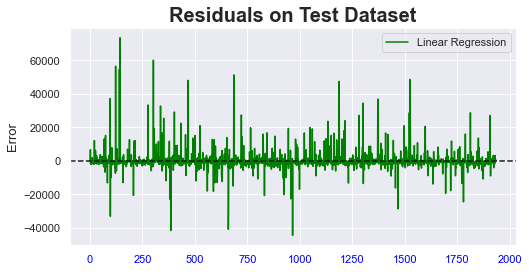

In [64]:
## draw Rediduals for each regression model, 
plt.figure(figsize=(8,4))
plt.plot(x_label, residuals_LR, color='green', label='Linear Regression')

plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals on Test Dataset', fontsize=20, fontweight = 'bold')
plt.ylabel('Error', fontsize=13)
plt.legend()
plt.xticks(color='blue')
plt.show()

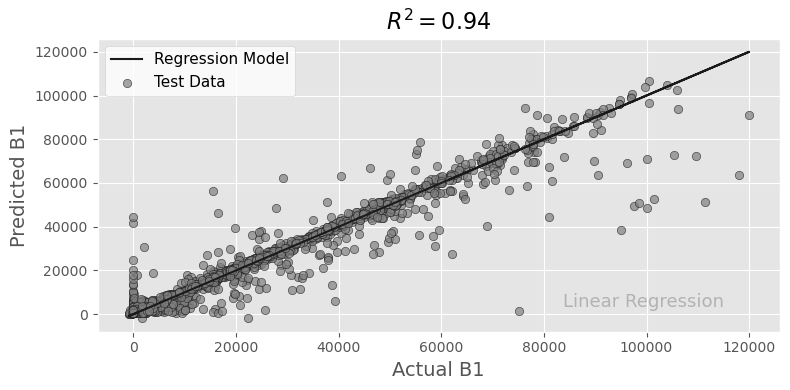

In [65]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

response = Y_pred_LR[:, 0]
y_actual = Y_test[:, 0]
ax.plot(y_actual, y_actual, color='k', label='Regression Model')
ax.scatter(y_actual, response, edgecolor='k', facecolor='grey', alpha=0.7, label='Test Data')
ax.set_ylabel('Predicted B1', fontsize=14)
ax.set_xlabel('Actual B1', fontsize=14)
ax.text(0.8, 0.1, 'Linear Regression', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2_LR, fontsize=16)

fig.tight_layout()

# Question 5-Linear Regression Equation 

In [66]:
intercept = Model_LR.intercept_[0]
intercept

-11781.443948542998

In [67]:
coef = Model_LR.coef_[0]
coef

array([60136.56659386, 82110.14998741,  1800.40680536,  1877.80259525,
       -4895.8921081 , -2500.55761883,   937.99241996,   116.21474039,
         543.8890889 ,   224.21664527])

In [68]:
# y_pred = model.intercept_ + model.coef_ * x
equation = f"[B1] = {str(int(intercept))}"
for i, col in enumerate(X_df.columns):
    if coef[i] > 0 :
        item = "+" + str(int(coef[i]))+"*[" + col + "]"
    else:
        item = str(int(coef[i]))+"*[" + col + "]"
    equation += item
equation

'[B1] = -11781+60136*[BALANCE]+82110*[B2]+1800*[B3]+1877*[B4]-4895*[B5]-2500*[R1]+937*[R2]+116*[R3]+543*[R4]+224*[R5]'